# Introduzione

In questo notebook sarà caricato un dataset contenente informazioni familiari, sociali, di salute e scolastiche di un gruppo studenti della scuola secondaria. Tra queste, i voti di fine anno e il consumo di alcoolici durante la settimana e nel weekend. L'obiettivo di questo notebook sarà quello di analizzare il dataset e quello di trovare il modello che meglio prevede il voto finale date le features. 

Questo dataset contiene i dati relativi al corso di portoghese, la lingua madre degli studenti.

Vediamo adesso i vari step per conseguire all'obiettivo prefissato

# 1. Carichiamo il dataset

In [67]:
import pandas as pd #importazione libreria pandas

# caricamento dataset
data = pd.read_csv(r'C:\Users\Daniel\OneDrive\Desktop\Dataframes\student-por.csv')

Adesso si caricano le prime 5 righe per vedere com'è composto il dataset:

In [68]:
pd.set_option('display.max_columns', None) # impostazione per visualizzare tutte le colonne dataset 

data.head() # visualizzazione prime 5 righe dataset

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         0       yes     no   no   
3    home   mother           1          3         0        no    yes   no   
4    home   father           1          2         0        no    yes   no   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  
0     1       3         4   0  11  11  
1     1       3         2   9  11  11  
2     3       3         6  12  13  12  
3     1       5         0  14  14  14  
4     2       5         0  11  13  13

Il dataset presenta un considerevole numero di colonne. Vediamo adesso una colonna per volta per vedere cosa significano e che tipo di variabili sono.

* **school** - scuola per studenti (binario: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)
* **sex** - sesso dello studente (binario: 'F' - femmina o 'M' - maschio)
* **age** - età dello studente (numerico: da 15 a 22)
* **address** - tipo di indirizzo di casa dello studente (binario: 'U' - urbano o 'R' - rurale)
* **famsize** - dimensione della famiglia (binario: 'LE3' - minore o uguale a 3 o 'GT3' - maggiore di 3)
* **Pstatus** - stato di convivenza del genitore (binario: 'T' - convivente o 'A' - separato)
* **Medu** - istruzione della madre (numerico: 0 - nessuno, 1 - istruzione primaria (4a classe), 2 - dalla 5a alla 9a elementare, 3 - istruzione secondaria o 4 - istruzione superiore)
* **Fedu** - istruzione del padre (numerico: 0 - nessuno, 1 - istruzione primaria (4a classe), 2 - dalla 5a alla 9a elementare, 3 - istruzione secondaria o 4 - istruzione superiore)
* **Mjob** - lavoro della madre (nominale: "insegnante", "salute", "servizi" civili (ad es. amministrativo o di polizia), "a casa" o "altro")
* **Fjob** - lavoro del padre (nominale: 'insegnante', 'sanitario', 'servizi' civili (es. amministrativo o di polizia), 'a_casa' o 'altro')
* **reason** - motivo per scegliere questa scuola (nominale: vicino a "casa", "reputazione" della scuola, preferenza "corso" o "altro")
* **guardian** - tutore dello studente (nominale: 'madre', 'padre' o 'altro')
* **traveltime** - tempo di viaggio da casa a scuola (numerico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 ora o 4 - >1 ora)
* **studytime** - tempo di studio settimanale (numerico: 1 - <2 ore, 2 - 2 a 5 ore, 3 - 5 a 10 ore o 4 - >10 ore)
* **failures** - numero di bocciature passate (numerico: n se 1<=n<3, altrimenti 4)
* **schoolsup** - supporto extra educativo (binario: sì o no)
* **famsup** - supporto educativo familiare (binario: sì o no)
* **paid** - lezioni a pagamento extra all'interno della materia del corso (matematica o portoghese) (binario: sì o no)
* **activities** - attività extracurriculari (binario: sì o no)
* **nursery** - scuola materna frequentata (binario: sì o no)
* **higher** - vuole frequentare un'istruzione superiore (binario: sì o no)
* **internet** - Accesso a Internet da casa (binario: sì o no)
* **romantic** - con una relazione romantica (binario: sì o no)
* **famrel** - qualità dei rapporti familiari (numerico: da 1 - pessimo a 5 - eccellente)
* **freetime** - tempo libero dopo la scuola (numerico: da 1 - molto basso a 5 - molto alto)
* **goout** - uscire con gli amici (numerico: da 1 - molto basso a 5 - molto alto)
* **Dalc** - consumo di alcol nei giorni lavorativi (numerico: da 1 - molto basso a 5 - molto alto)
* **Walc** - consumo di alcol nel fine settimana (numerico: da 1 - molto basso a 5 - molto alto)
* **health** - stato di salute attuale (numerico: da 1 - molto cattivo a 5 - molto buono)
* **absences** - numero di assenze scolastiche (numerico: da 0 a 93)

Questi voti sono correlati alla materia del corso cioè portoghese:

* **G1** - voto primo periodo (numerico: da 0 a 20)
* **G2** - voto secondo periodo (numerico: da 0 a 20)
* **G3** - voto finale (numerico: da 0 a 20, output target)

Prima di iniziare l'analisi dei dati si controlla che i dati siano effettivamente puliti e che non ci siano valori mancanti o nulli da gestire. 

# 2. Data Cleaning

In [69]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [70]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Ora che siamo certi di nessun valore nullo o mancante da gestire controlliamo se le colonne categoriche abbiano effettivamente le categorie indicate nella descrizione sopra e se le colonne numeriche siano effettivamente nel range di numeri indicati.

In [71]:
cat_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
              'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
              'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
              'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc',
              'health']

num_columns = ['age', 'absences', 'G1', 'G2', 'G3']

for col in cat_columns:
    print(f'Valori unici colonna {col}: {data[col].unique()}')
    
print('-----------------------------------------------------------')

for col in num_columns:
    print(f'Range valori colonna {col} dal minimo {data[col].min()} al massimo {data[col].max()}')

Valori unici colonna school: ['GP' 'MS']
Valori unici colonna sex: ['F' 'M']
Valori unici colonna address: ['U' 'R']
Valori unici colonna famsize: ['GT3' 'LE3']
Valori unici colonna Pstatus: ['A' 'T']
Valori unici colonna Medu: [4 1 3 2 0]
Valori unici colonna Fedu: [4 1 2 3 0]
Valori unici colonna Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Valori unici colonna Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
Valori unici colonna reason: ['course' 'other' 'home' 'reputation']
Valori unici colonna guardian: ['mother' 'father' 'other']
Valori unici colonna traveltime: [2 1 3 4]
Valori unici colonna studytime: [2 3 1 4]
Valori unici colonna failures: [0 3 1 2]
Valori unici colonna schoolsup: ['yes' 'no']
Valori unici colonna famsup: ['no' 'yes']
Valori unici colonna paid: ['no' 'yes']
Valori unici colonna activities: ['no' 'yes']
Valori unici colonna nursery: ['yes' 'no']
Valori unici colonna higher: ['yes' 'no']
Valori unici colonna internet: ['no' 'yes']
Valori unici

Rispetto alla descrizione vista sopra si può notare come le categorie corrispondano mentre ciò che cambia sono il range dei valori nelle colonne numeriche ad eccezione dell'età.  

Adesso controlliamo se ci sono dei duplicati nel nostro dataset

In [72]:
duplicated = data[data.duplicated() == True]

duplicated

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

Ora con la certezza che non ci sono dei duplicati abbiamo il dataset pronto per essere analizzato

# 3. EDA

Una premessa prima di iniziare: è doveroso dire che ogni considerazione che verrà fatta è basata sul dataset a disposizione quindi ciò che verrà fuori non è generalizzabile. 

Prima di creare il profile report del nostro dataset bisogna trasformare le categorie indicate come numeri in vere e proprie categorie altrimenti il report le considererà come colonne numeriche, cosa inesatta. 

In [73]:
dataframe = data.copy()

data['Medu'] = data['Medu'].replace({0: 'Nessuna', 1: 'istruzione primaria (4th grado)', 
                      2: 'dal 5th al 9th grado', 3: 'istruzione secondaria',
                      4: 'istruzione superiore'})
data['Fedu'] = data['Fedu'].replace({0: 'Nessuna', 1: 'istruzione primaria (4th grado)', 
                      2: 'dal 5th al 9th grado', 3: 'istruzione secondaria',
                      4: 'istruzione superiore'})
data['famrel'] = data['famrel'].replace({ 1: 'very bad', 2: 'bad', 3: 'normal', 
                                         4: 'excellent', 5: 'very excellent'})

data['freetime'] = data['freetime'].replace({ 1: 'very low', 2: 'low', 3: 'normal', 
                                         4: 'high', 5: 'very high'})

data['goout'] = data['goout'].replace({ 1: 'very low', 2: 'low', 3: 'normal', 
                                         4: 'high', 5: 'very high'})

data['Dalc'] = data['Dalc'].replace({ 1: 'very low', 2: 'low', 3: 'normal', 
                                         4: 'high', 5: 'very high'})

data['Walc'] = data['Walc'].replace({ 1: 'very low', 2: 'low', 3: 'normal', 
                                         4: 'high', 5: 'very high'})

data['health'] = data['health'].replace({ 1: 'very bad', 2: 'bad', 3: 'normal', 
                                         4: 'good', 5: 'very good'})

In [74]:
data.head()

school sex  age address famsize Pstatus                             Medu  \
0     GP   F   18       U     GT3       A             istruzione superiore   
1     GP   F   17       U     GT3       T  istruzione primaria (4th grado)   
2     GP   F   15       U     LE3       T  istruzione primaria (4th grado)   
3     GP   F   15       U     GT3       T             istruzione superiore   
4     GP   F   16       U     GT3       T            istruzione secondaria   

                              Fedu     Mjob      Fjob  reason guardian  \
0             istruzione superiore  at_home   teacher  course   mother   
1  istruzione primaria (4th grado)  at_home     other  course   father   
2  istruzione primaria (4th grado)  at_home     other   other   mother   
3             dal 5th al 9th grado   health  services    home   mother   
4            istruzione secondaria    other     other    home   father   

   traveltime  studytime  failures schoolsup famsup paid activities nursery  \
0           2          2         0       yes     no   no         no     yes   
1           1          2         0        no    yes   no         no      no   
2           1          2         0       yes     no   no         no     yes   
3           1          3         0        no    yes   no        yes     yes   
4           1          2         0        no    yes   no         no     yes   

  higher internet romantic          famrel freetime   goout      Dalc  \
0    yes       no       no       excellent   normal    high  very low   
1    yes      yes       no  very excellent   normal  normal  very low   
2    yes      yes       no       excellent   normal     low       low   
3    yes      yes      yes          normal      low     low  very low   
4    yes       no       no       excellent   normal     low  very low   

       Walc     health  absences  G1  G2  G3  
0  very low     normal         4   0  11  11  
1  very low     normal         2   9  11  11  
2    normal     normal         6  12  13  12  
3  very low  very good         0  14  14  14  
4       low  very good         0  11  13  13

Ora si può generare il report

In [75]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data)

In [76]:
profile

Summarize dataset:   0%|          | 0/47 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Da questo report si possono avere diverse informazioni per ogni features del nostro dataset, vediamo in sintesi le informazioni più importanti:

Prima di addentrarci dentro ogni features si scopre come si hanno 33 variabili (G3 variabile target, le rimanenti features) di cui 28 categoriali, 8 booleane (yes/no) e 20 categoriali ordinali e nominali mentre le altre 5 sono numeriche. Inoltre si scopre come si abbiano 649 osservazioni e altre informazioni di cui ci siamo già occupati in precedenza come i valori nulli e i duplicati.

Giustamente ti starai chiedendo quale sia la differenza tra variabili categoriali ordinali e nominali e le variabili numeriche, prima di andare avanti rispondiamo a questa domanda:
La differenza tra variabile numerica e categorica è che nelle variabili numeriche le operazioni matematiche hanno senso (es. l'età media degli studenti) mentre nelle variabili categoriche esse non lo hanno (es. media traveltime nonostante le categorie siano rappresentati come numeri non ha senso). 

Invece la differenza tra le variabili categoriali ordinali e le variabili categoriali nominali è che le prime seguono una gerarchia, come per esempio freetime, mentre le seconde sono una distinzione non gerarchica, come per esempio Mjob.

Per non essere troppo prolissi non entriamo nel dettaglio ripetendo le informazioni per ogni features visibile nel report, le cose importanti da sapere sono:

* Per ogni variabile numerica il report ci fornisce il numero dei valori distinti con relativa percentuale, cosi come per i valori mancanti, infiniti e zeri. Inoltre fornisce la media, il massimo e il minimo e crea un istogramma per visualizzare la distribuzione dei dati a disposizione per quella variabile, inoltre è possibile visualizzare diverse informazioni del grafico creato cliccando su **toggle details**.
* Per ogni variabile categorica il report ci fornisce come per le numeriche il numero dei valori distinti con relativa percentuale, cosi come per i valori mancanti mancanti. Inoltre il report ci fornisce un grafico a barre che ci mostra la frequenza con cui si ripetono le varie categorie inoltre è possibile visualizzare diverse informazioni del grafico creato cliccando su **toggle details**.
* Per ogni variabile booleana vengono mostrate le stesse informazioni delle variabili categoriche essendo alla fine anch'essa una variabile categorica con due opzioni yes o no.

Nella sezione **Warnings** del report è possibile visualizzare informazioni che il report ritiene importanti, in questo caso l'alta correlazione tra G3 e G2 anche se prevedibile è molto interessante.

Una volta fatto ciò analizziamo qualche correlazione tra alcune variabili.
Iniziamo ad esaminare appunto la correlazione tra G1, G2, G3 che immaginiamo sia molto alta

In [77]:
df = data.copy()

df = df[['G1', 'G2', 'G3']]
        
df.corr()

G1    G2    G3
G1 1.000 0.865 0.826
G2 0.865 1.000 0.919
G3 0.826 0.919 1.000

Come prevedibile il nostro target ovvero il voto finale ha una correlazione molto alta sia con il voto del primo periodo che soprattutto con il voto del secondo periodo. 

Vediamo adesso come sono le distribuzioni delle votazioni finale al variare alle categorie di tutte le features categoriche.

Per fare ciò usiamo il boxplot. Ma cos'è un boxplot?

Il boxplot utilizza riquadri (scatola) e linee (baffi) per rappresentare le distribuzioni di uno o più gruppi di dati numerici. La costruzione di esso si basa sui quartili di un set di dati o sui valori che dividono il set di dati in quarti uguali. Quindi si hanno le seguenti misure:

* Primo quartile: maggiore del 25% dei dati e inferiore all'altro 75%
* Secondo quartile: si trova nel mezzo dividendo a metà i dati, noto soprattutto come la **mediana**
* Terzo quartile: maggiore del 75% dei dati e inferiore all'altro 25%

Le estremità della scatola e la sua linea centrale segnano le posizioni dei 3 quartili descritti precedentemente mentre ogni baffo (baffo inferiore e baffo superiore) sono estesi fino al punto dati più lontano in ciascuna ala che si trova entro 1,5 volte Intervallo Interquartile (Q3-Q1). I dati al di fuori di questo range sono i valori anomali e sono disegnati semplicemente come dei punti

Ovviamente i dati non sono con un ordine casuale ma sono ordinati in maniera crescente cioè dal valore più basso al valore più alto.

Questo tipo di grafico serve per vedere se c'è una variazione del voto finale al variare di una particolare categoria. Ipotizzo che studytime e traveltime siano le variabili che influenzino di più la votazione finale.

C:\Users\Daniel\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


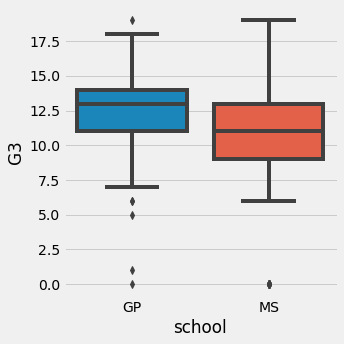

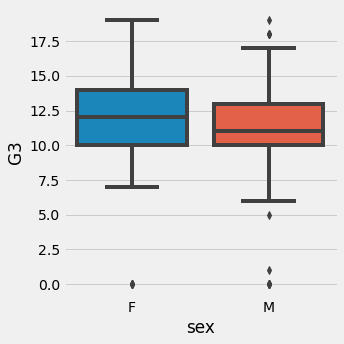

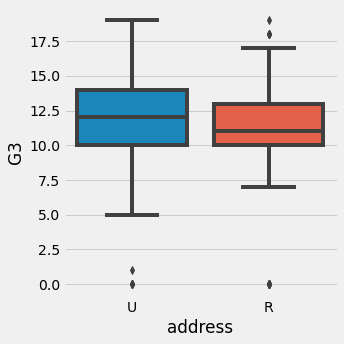

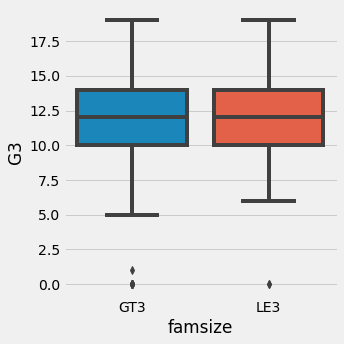

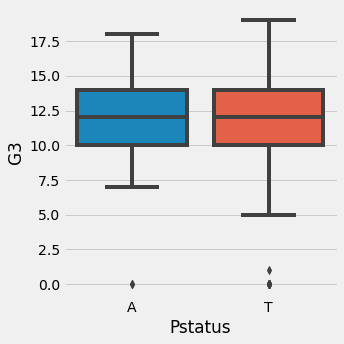

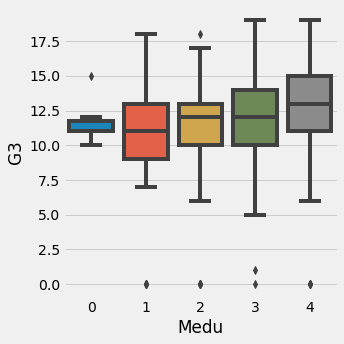

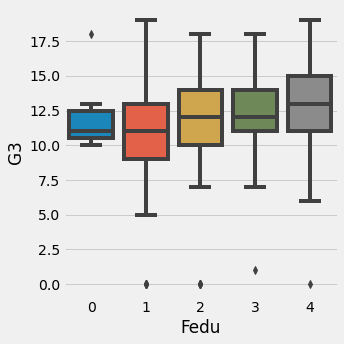

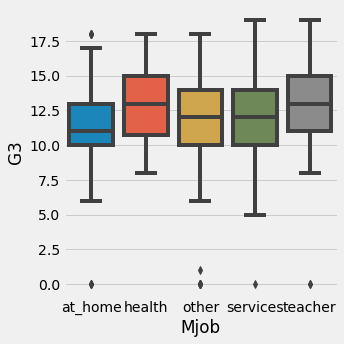

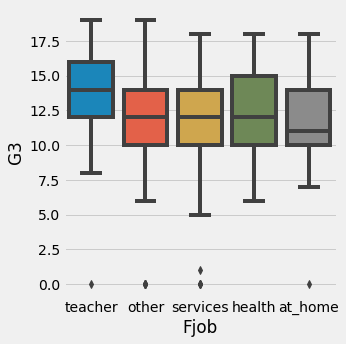

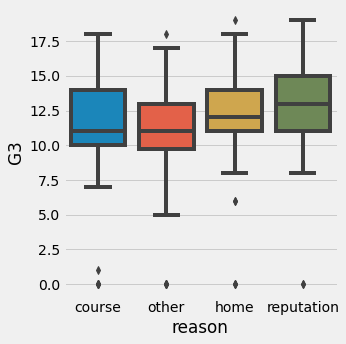

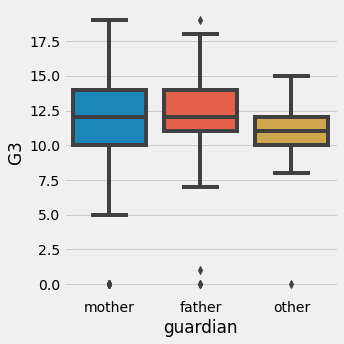

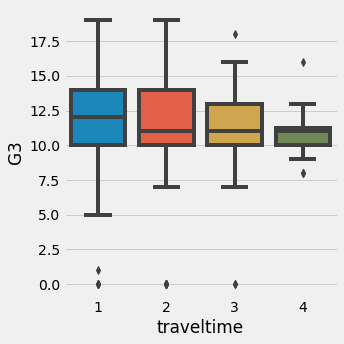

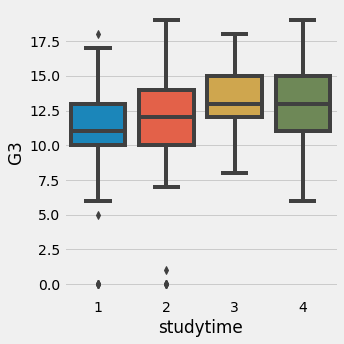

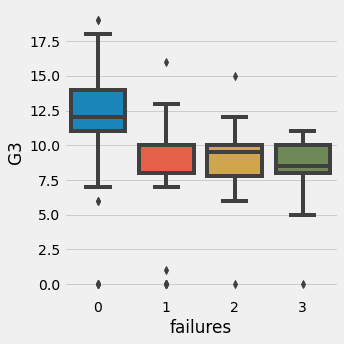

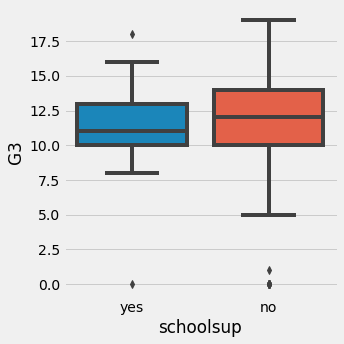

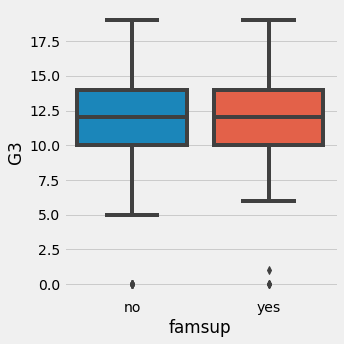

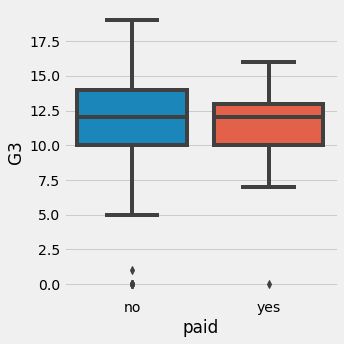

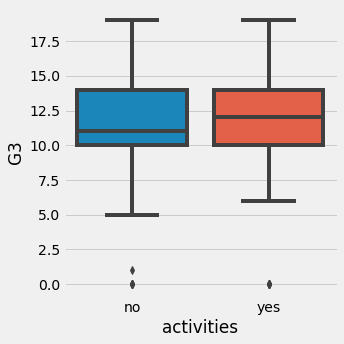

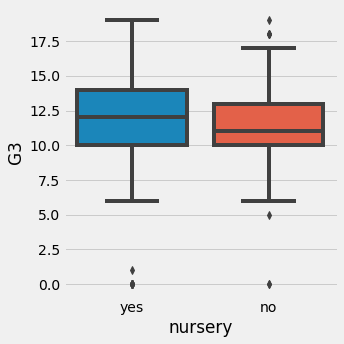

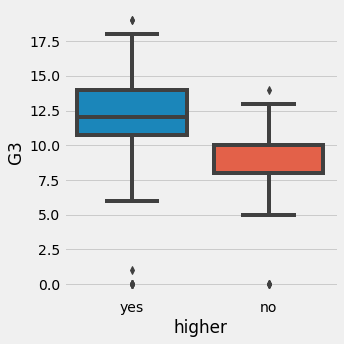

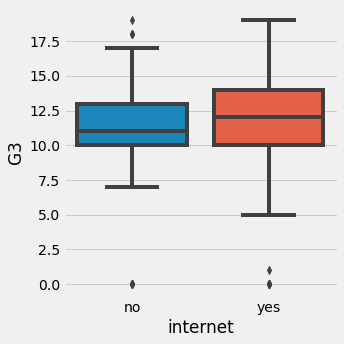

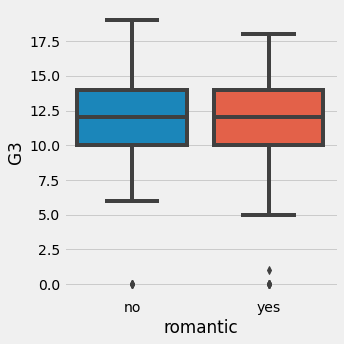

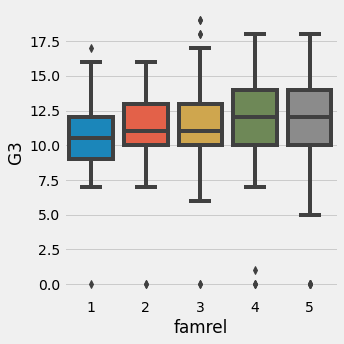

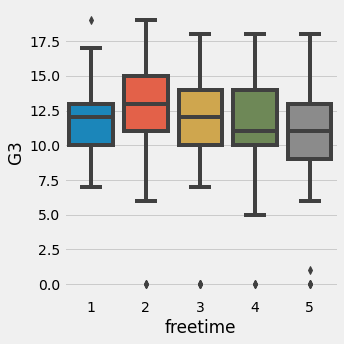

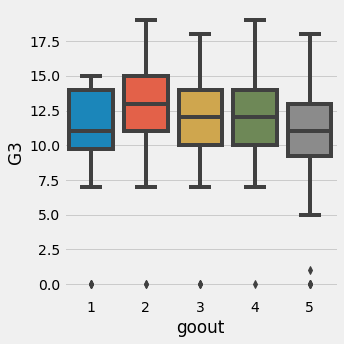

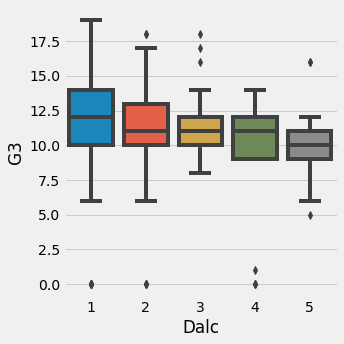

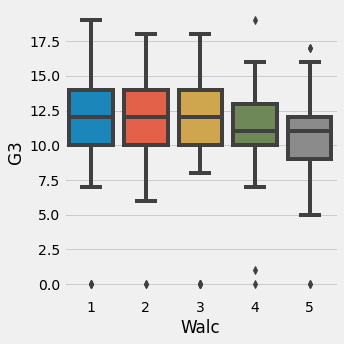

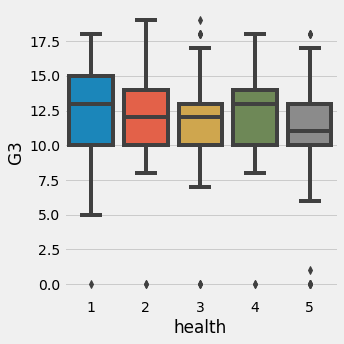

In [78]:
import seaborn as sns

df = dataframe[cat_columns]
df = df.join(data['G3'])

for x in df.columns:
    if x != 'G3':
        sns.catplot(x=x, y="G3", kind='box', data=df)

Piccola premessa, quando si parla di votazioni più alte si intende confrontando le distribuzioni e vedendo la linea centrale del box ovvero la mediana, non si sta parlando di votazione media più alta.
Da questa serie di boxplot si possono capire le seguenti informazioni:

* **school**: 
    * In linea generale gli studenti del Gabriel Pereira (GP) hanno ottenuto una votazione maggiore rispetto che gli studenti che frequentano il Mousinho da Silveira (MS) confrontando i due box mentre confrontando i baffi se per il baffo inferiore vale come detto precedentemente nel baffo superiore gli studenti del MS hanno un picco non outlier più alto. 
    * C'è una maggiore variabilità nelle votazioni degli studenti del MS. 
    * Da notare come il GP ha molti outliers, uno oltre il baffo superiore e 4 con il baffo inferiore mentre MS ne ha presente solo uno
    
* **sex**:
    * In linea generale gli studenti di sesso femminile (F) hanno una votazione leggermente migliore rispetto che agli studenti si sesso maschile (M) confrontando i due box mentre confrontando i baffi il divario sia in positivo che in negativo è più ampio.
    * C'è una maggiore variabilità nelle votazione degli studenti di sesso femminile
    * Da notare come il sesso femminile ha solo un outlier nel baffo inferiore mentre il sesso maschile ha 2 outliers nel baffo superiore e 3 nel baffo inferiore

* **address**:
    * In linea generale gli studenti abitanti in zone urbane (U) hanno una votazione leggermente migliore rispetto che agli studenti abitanti in zone rurali (R) confrontando i due box mentre confrontando i baffi il divario sia in positivo che in negativo è più ampio.
    * C'è una maggiore variabilità nelle votazione degli studenti abitanti in zone urbane
    * Da notare come U due outliers nel baffo inferiore mentre R ha 2 outliers nel baffo superiore ed 1 nel baffo inferiore
    
* **famsize**:
    * In linea generale gli studenti con una dimensione familiare più grande di 3 (GT3) e gli studenti con una dimensione familiare più piccola di 3 (LE3) hanno una votazione praticamente identica con un solo outlier di differenza e una piccola differenza nella dimensione del baffo inferiore.
    
* **Pstatus**:
    * Stesso identico discorso di famsize
    
* **Medu**:
    * All'aumentare del grado di educazione della figura materna aumenta leggermente la votazione degli studenti ma si parla di una varianza tra le mediane dei vari gruppi molto bassa
    
* **Fedu**:
    * Stesso discorso di Medu
    
* **Mjob**:
    * Il lavoro materno at_home ha le votazioni leggermente più basse mentre i lavori teacher ed health hanno le votazioni più alte 
    
* **Fjob**:
    * Quasi lo stesso discorso di Mjob con una differenza tra teacher e gli altri lavori più rimarcata
    
* **reason**:
    * Controintuitivamente chi ha scelto la scuoòa perchè vicino casa e per la reputazione di essa ha votazioni leggermente più alte di chi l'ha scelta per fare apposta specifici corsi.
    
* **guardian**:
    * Gli studenti con un tutore che non è la madre o il padre hanno una votazione leggermente più bassa mentre le altre due categorie hanno votazioni quasi identiche
    
* **traveltime**: 
    * All'aumentare del tempo di viaggio scuola casa i voti degli studenti diminuiscono anche se si parla di una varianza per quanto riguarda le mediane bassa mentre nel baffo superiore è più sostanziale

* **studytime**:
    * Come prevedibile all'aumentare il tempo dello studio aumenta la votazione finale anche se non c'è una grossa differenza tra lo studiare dalle 5 alle 10 ore settimanali o a studiarne di più.

* **failures**:
    * Chi non è stato bocciato ha una votazione decisamente migliore degli altri studenti con almeno una bocciatura, la varianza del voto è più lieve in base al numero di bocciature anche se più sono più basso è il voto finale con cui escono

* **schoolsup**:
    * Chi ha usufluito di un supporto d'educazione extra ha ottenuto una votazione finale più bassa rispetto a chi non ne ha avuto bisogno anche se essa ha portato gli studenti che ne hanno fatto uso ad avere una varianza minore con votazioni minime (esclusi gli outlers) più alte delle votazioni minime degli studenti che non ne hanno fatto uso 
   
* **famsup**:
    * A differenza di sopra chi ha usufluito di un supporto d'educazione familiare ha ottenuto pressochè le stesse votazioni di chi non ne ha avuto bisogno.

* **paid**:
    * Chi ha usufluito di lezioni a pagamento extra all'interno delle materie del corso di matematico o di portoghese non ha avuto una votazione migliore di chi ha scelto di non farle. Come nelle due features sopra chi ne ha usufluito ha avuto una varianza di voti inferiore rispetto agl'altri.
    
* **activities**:
    * Chi ha svolto attività extracurriculari ha ottenuto una votazione leggermente migliore di chi non le ha svolte
    
* **nursery**:
    * Stesso discorso di activities
    
* **higher**:
    * Stesso discorso di activities ma con una differenza molto più netta
    
* **internet**:
    * Stesso discorso di activities
    
* **romantic**:
    * Stesso discorso di famsize
    
* **famrel**:
    * Stesso discorso di Medu
    
* **freetime**:
    * Chi ha low tempo libero dopo scuola ha una votazione più alta mentre chi ha molto o moltissimo tempo libero ha una votazione più bassa ma si parla di una variazione di mediana molto piccola.

* **goout**:
    * Stesso discorso di freetime solo con chi esce pochissimo fuori con gli amici ha una votazione più bassa come di chi ci esce moltissimo

* **Dalc**:
    * All'aumentare della frequenza della consumazione alcolica in settimana diminuisce il voto finale ma si parla di una variazione tra le mediane bassa

* **Walc**: 
    * Chi consuma spesso o spessissimo alcool nel weekend ha una votazione finale leggermente più bassa mentre nelle altre categorie non c'è alcuna differenza di votazione.
    
* **health**:
    * Sorprendentemente chi ha uno status di salute alto e molto basso ha una valutazione più alta mentre chi sta molto meno ottiene voti più bassi ma si parla di una variazione tra le mediane bassa. 

10    22
14    16
11    15
13    13
15    13
17    12
12    10
8      9
0      8
16     7
7      4
18     4
9      4
6      2
19     1
Name: G3, dtype: int64


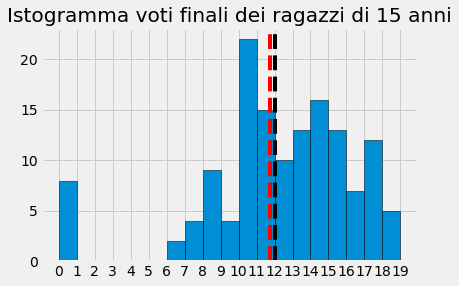

10    30
13    22
11    20
12    18
15    16
14    15
9     13
17    11
16    11
8      9
18     7
7      3
0      2
6      1
19     1
Name: G3, dtype: int64


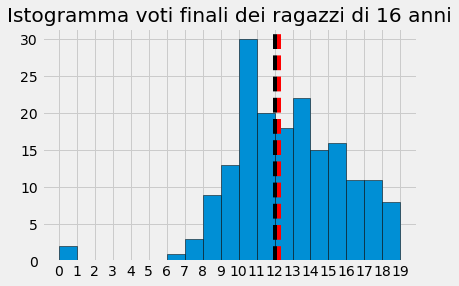

11    23
12    21
13    15
14    14
10    12
9      9
15     8
16     5
8      3
17     1
18     1
Name: G3, dtype: int64


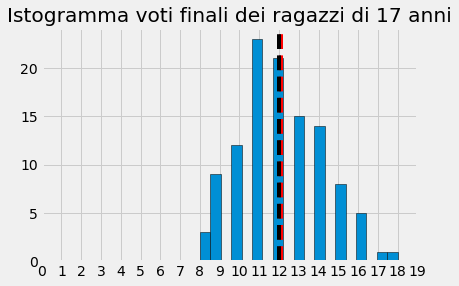

11    36
13    30
10    22
12    19
14    17
8     14
16    13
15    10
17     5
18     3
9      3
0      2
7      2
1      1
Name: G3, dtype: int64


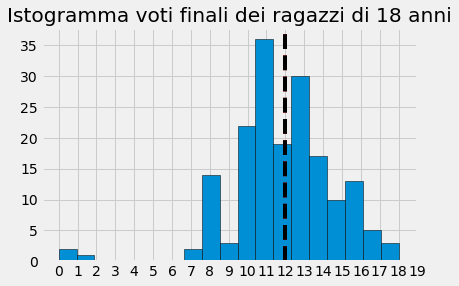

11    10
10     7
9      6
0      3
12     2
13     2
14     1
7      1
Name: G3, dtype: int64


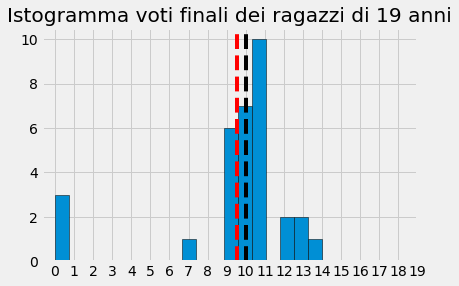

5    1
Name: G3, dtype: int64


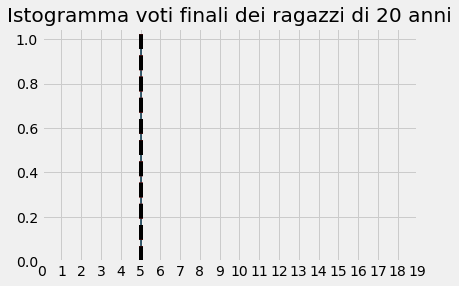

10    3
15    2
12    1
Name: G3, dtype: int64


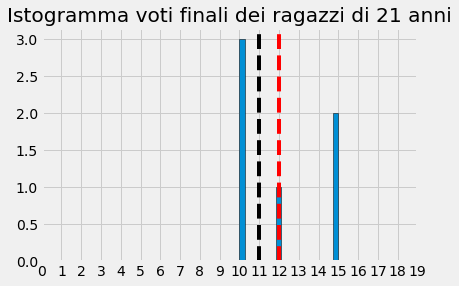

12    1
10    1
Name: G3, dtype: int64


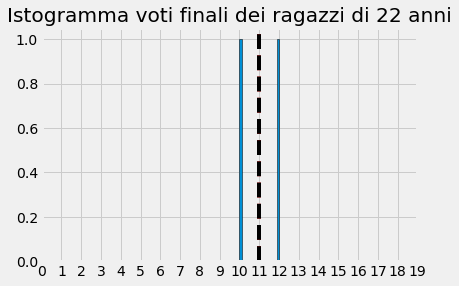

In [79]:
import matplotlib.pyplot as plt
import numpy as np

df = dataframe[num_columns]

lst = ['15', '16', '17', '18', '19', '20', '21', '22']
cnt = 0
for i in df['age'].unique():
    age_df = df[df['age'] == i]
    plt.hist(age_df['G3'], bins=19, ec='black')
    plt.xticks(np.arange(0, 20, 1))
    plt.axvline(x=age_df['G3'].mean(),color='red', ls='--')
    plt.axvline(x=age_df['G3'].median(),color='black', ls='--')
    plt.title(f'Istogramma voti finali dei ragazzi di {lst[cnt]} anni')
    cnt += 1
    print(age_df['G3'].value_counts())
    plt.show()

In questo pezzo di codice vengono generati al variare dell'età una stampa che ci mostra il conteggio dei voti e il relativo istogramma che semplicemente inserisce in chiave grafica queste informazioni.

Prima di analizzare i grafici generati spieghiamo cos'è un istogramma.
Un istogramma si intende un grafico cartesiano utilizzato per descrivere la distribuzione in classi di una variabile quantitativa con molti valori diversi tra loro.

Adesso analizziamo uno per uno questa serie di istogrammi:

* L'istogramma dei voti finali dei ragazzi di 15 anni descrive come la media (linea rossa) sia più piccola della mediana (linea nera) e questo indica che l'istogramma è obliquo a sinistra con una concentrazione di valori maggiore nei voti più alti rispetto ai valori delle linee. Inoltre esso presenta un picchio a 10 che è il voto più comune in questa fascia d'età mentre la grossa affluenza dei voti dei ragazzi varia da 10 a 17 con il voto 16 escluso. 

* L'istogramma dei voti finali dei ragazzi di 16 anni descrive come la media (linea rossa) sia più grande della mediana (linea nera) e questo indica che l'istogramma è obliquo a destra con una concentrazione di valori maggiore nei voti più bassi rispetto ai valori delle linee. Inoltre esso presenta un picchio a 10 che è il voto più comune in questa fascia d'età mentre la grossa affluenza dei voti dei ragazzi varia da 9 a 17.

* L'istogramma dei voti finali dei ragazzi di 17 anni descrive come la media (linea rossa) sia più grande della mediana (linea nera) e questo indica che l'istogramma è obliquo a destra con una concentrazione di valori maggiore nei voti più bassi rispetto ai valori delle linee. Inoltre esso presenta due picchi a 11 e a 12 che sono i voti più comuni in questa fascia d'età mentre la grossa affluenza dei voti dei ragazzi varia da 10 a 14.

* L'istogramma dei voti finali dei ragazzi di 18 anni descrive come la media (linea rossa) sia di uguale valore della mediana (linea nera) e questo indica che l'istogramma è simmetrico. Inoltre esso presenta due picchi a 11 e a 13 che sono i voti più comuni in questa fascia d'età mentre la grossa affluenza dei voti dei ragazzi varia da 8 a 16 con il voto 9 escluso.

* L'istogramma dei voti finali dei ragazzi di 19 anni descrive come la media (linea rossa) sia più piccola della mediana (linea nera) e questo indica che l'istogramma è obliquo a sinistra con una concentrazione di valori maggiore nei voti più alti rispetto ai valori delle linee. Inoltre esso presenta un picchio a 11 che è il voto più comune in questa fascia d'età mentre la grossa affluenza dei voti dei ragazzi varia da 9 a 11. Da questa fascia d'età in poi da come si vede sopra gli studenti sono sempre meno comuni.

* L'istogramma dei voti finali dei ragazzi di 20 anni non esiste in quanto è presente solo uno studente con una votazione finale pari a 5

* L'istogramma dei voti finali dei ragazzi di 21 anni non esiste in quanto sono presenti soltanto 6 studenti di cui 3 hanno preso una votazione di 10, uno con 12 e 2 con 15.

* L'istogramma dei voti finali dei ragazzi di 22 anni non esiste in quanto sono presenti soltanto 2 studenti che hanno preso una votazione di 10 e 12.

# 4. Preparazione dati per modelli ML
Prima di iniziare a vedere i modelli è fondamentale preparare i dati. Cosa prevede ciò? Lo vediamo subito

## Codifica one-hot

Come visto sopra il nostro dataset ha moltissime features categoriche e per esse si utilizzerà la codifica one-hot per includerle in un modello. Un algoritmo di apprendimento automatico non è in grado di comprendere la scuola "GP" o "MS", quindi dobbiamo creare una colonna dedicata alla categoria GP e registrarlo come 1 se la scuola è GP altrimenti zero. Questo passaggio va ripetuto per tutte le features categoriche e questo porta ad un aumento considerevole di features. Ora vediamo come fare questo passaggio.

In [80]:
dataframe['Medu'] = dataframe['Medu'].replace({0: 'Nessuna', 1: 'istruzione primaria (4th grado)', 
                      2: 'dal 5th al 9th grado', 3: 'istruzione secondaria',
                      4: 'istruzione superiore'})

dataframe['Fedu'] = dataframe['Fedu'].replace({0: 'Nessuna', 1: 'istruzione primaria (4th grado)', 
                      2: 'dal 5th al 9th grado', 3: 'istruzione secondaria',
                      4: 'istruzione superiore'})

dataframe['traveltime'] = dataframe['traveltime'].replace({1: '<15 min', 
                      2: '15 to 30 min ', 3: '30 min to 1 hour',
                      4: '>1 hour'})

dataframe['studytime'] = dataframe['studytime'].replace({1: '<2 hours', 
                      2: '2 to 5 hours', 3: '5 to 10 hours',
                      4: '>10 hours'})

dataframe['failures'] = dataframe['failures'].replace({0: '0', 1: '1', 
                      2: '2', 3: '3'})

dataframe['famrel'] = dataframe['famrel'].replace({1: 'very bad', 2: 'bad', 
                      3: 'normal', 4: 'good',
                      5: 'excellent'})

dataframe['freetime'] = dataframe['freetime'].replace({1: 'very low', 2: 'low', 
                      3: 'normal', 4: 'high',
                      5: 'very high'})

dataframe['goout'] = dataframe['goout'].replace({1: 'very low', 2: 'low', 
                      3: 'normal', 4: 'high',
                      5: 'very high'})

dataframe['Dalc'] = dataframe['Dalc'].replace({1: 'very low', 2: 'low', 
                      3: 'normal', 4: 'high',
                      5: 'very high'})

dataframe['Walc'] = dataframe['Walc'].replace({1: 'very low', 2: 'low', 
                      3: 'normal', 4: 'high',
                      5: 'very high'})

dataframe['health'] = dataframe['health'].replace({1: 'very bad', 2: 'bad', 
                      3: 'normal', 4: 'good',
                      5: 'very good'})

# Select the numeric columns
numeric_data = dataframe[num_columns]

# Select the categorical columns
categorical_data = dataframe[cat_columns]

# One hot encode
categorical_data = pd.get_dummies(categorical_data)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
data = pd.concat([numeric_data, categorical_data], axis = 1)

data.shape

(649, 100)

Come si può notare il numero delle features è passato da 32 a 99 (nel dataset è compreso il target G3 quindi risultano 100 colonne). Prima di andare avanti vediamo se il codice sopra ha generato tutte le colonne come deve senza aver tralasciato alcuna feature categorica:

In [81]:
data.head()

age  absences  G1  G2  G3  school_GP  school_MS  sex_F  sex_M  address_R  \
0   18         4   0  11  11          1          0      1      0          0   
1   17         2   9  11  11          1          0      1      0          0   
2   15         6  12  13  12          1          0      1      0          0   
3   15         0  14  14  14          1          0      1      0          0   
4   16         0  11  13  13          1          0      1      0          0   

   address_U  famsize_GT3  famsize_LE3  Pstatus_A  Pstatus_T  Medu_Nessuna  \
0          1            1            0          1          0             0   
1          1            1            0          0          1             0   
2          1            0            1          0          1             0   
3          1            1            0          0          1             0   
4          1            1            0          0          1             0   

   Medu_dal 5th al 9th grado  Medu_istruzione primaria (4th grado)  \
0                          0                                     0   
1                          0                                     1   
2                          0                                     1   
3                          0                                     0   
4                          0                                     0   

   Medu_istruzione secondaria  Medu_istruzione superiore  Fedu_Nessuna  \
0                           0                          1             0   
1                           0                          0             0   
2                           0                          0             0   
3                           0                          1             0   
4                           1                          0             0   

   Fedu_dal 5th al 9th grado  Fedu_istruzione primaria (4th grado)  \
0                          0                                     0   
1                          0                                     1   
2                          0                                     1   
3                          1                                     0   
4                          0                                     0   

   Fedu_istruzione secondaria  Fedu_istruzione superiore  Mjob_at_home  \
0                           0                          1             1   
1                           0                          0             1   
2                           0                          0             1   
3                           0                          0             0   
4                           1                          0             0   

   Mjob_health  Mjob_other  Mjob_services  Mjob_teacher  Fjob_at_home  \
0            0           0              0             0             0   
1            0           0              0             0             0   
2            0           0              0             0             0   
3            1           0              0             0             0   
4            0           1              0             0             0   

   Fjob_health  Fjob_other  Fjob_services  Fjob_teacher  reason_course  \
0            0           0              0             1              1   
1            0           1              0             0              1   
2            0           1              0             0              0   
3            0           0              1             0              0   
4            0           1              0             0              0   

   reason_home  reason_other  reason_reputation  guardian_father  \
0            0             0                  0                0   
1            0             0                  0                1   
2            0             1                  0                0   
3            1             0                  0                0   
4            1             0                  0                1   

   guardian_mother  guardian_other

Prima di passare alla features selection vera e propria è possibile eliminare alcune colonne generate dalla codifica one-hot perchè questo processo può portare alla multicollinearità cioè che in questo scenario le variabili presenti diventano altamente correlate tra loro. Generiamo adesso la matrice di correlazione per vedere appunto dove è presente la multicollinearità. Nel pezzo di codice qua sotto si andranno ad eliminare le features con una correlazione superiore a 0.7.

In [82]:
y = data['G3']
X = data.drop('G3', axis=1)

X_num = X[['age', 'absences', 'G1', 'G2']]
X = X.drop(['age', 'absences', 'G1', 'G2'], axis=1)

# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features 
X.drop(to_drop, axis=1, inplace=True)

X

C:\Users\Daniel\AppData\Local\Temp\ipykernel_20592\1189834275.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


school_GP  sex_F  address_R  famsize_GT3  Pstatus_A  Medu_Nessuna  \
0            1      1          0            1          1             0   
1            1      1          0            1          0             0   
2            1      1          0            0          0             0   
3            1      1          0            1          0             0   
4            1      1          0            1          0             0   
..         ...    ...        ...          ...        ...           ...   
644          0      1          1            1          0             0   
645          0      1          0            0          0             0   
646          0      1          0            1          0             0   
647          0      0          0            0          0             0   
648          0      0          1            0          0             0   

     Medu_dal 5th al 9th grado  Medu_istruzione primaria (4th grado)  \
0                            0                                     0   
1                            0                                     1   
2                            0                                     1   
3                            0                                     0   
4                            0                                     0   
..                         ...                                   ...   
644                          1                                     0   
645                          0                                     0   
646                          0                                     1   
647                          0                                     0   
648                          0                                     0   

     Medu_istruzione secondaria  Medu_istruzione superiore  Fedu_Nessuna  \
0                             0                          1             0   
1                             0                          0             0   
2                             0                          0             0   
3                             0                          1             0   
4                             1                          0             0   
..                          ...                        ...           ...   
644                           0                          0             0   
645                           1                          0             0   
646                           0                          0             0   
647                           1                          0             0   
648                           1                          0             0   

     Fedu_dal 5th al 9th grado  Fedu_istruzione primaria (4th grado)  \
0                            0                                     0   
1                            0                                     1   
2                            0                                     1   
3                            1                                     0   
4                            0                                     0   
..                         ...                                   ...   
644                          0                                     0   
645                          0                                     1   
646                          0                                     1   
647                          0                                     1   
648                          1                                     0   

     Fedu_istruzione secondaria  Fedu_istruzione superiore  Mjob_at_home  \
0                             0                          1             1   
1                             0                          0             1   
2                             0                          0             1   
3                             0                          0             0   
4                             1                          0             0   
..               

Nonostante il passaggio sopra per una prima selezione ciò non basta. Le features categoriche sono ancora numerosissime perciò andrà fatto qualcos'altro.

## Feature selection

La Selezione delle caratteristiche è il processo di riduzione del numero di variabili in input durante lo sviluppo di un modello predittivo. Questo processo è auspicabile sia per ridurre il costo computazionale della modellazione sia, in alcuni casi, migliorare le prestazioni del modello. I metodi di selezione delle caratteristiche basati su statistiche implicano la valutazione della relazione tra ciascuna variabile di input e la variabile di destinazione utilizzando le statistiche e la selezione di quelle variabili di input che hanno la relazione più forte con la variabile di destinazione. Questi metodi possono essere veloci ed efficaci, sebbene la scelta delle misure statistiche dipenda dal tipo di dati delle variabili di input e di output.
Perciò nel codice seguente faremo proprio ciò.

Entrando nel dettaglio selezioneremo le 10 features con una relazione maggiore con la variabile di output cioè G3. Per fre ciò dobbiamo vedere quale misura statistica è più adatta in base alle features (quasi tutte categoriche) e la variabile target (numerica). Questo è un casistica decisamente poco comune e una misura statistica in grado di aiutarci è ANOVA.

Prima di andare avanti spieghiamo cos'è e come funziona ANOVA:

ANOVA(**AN**alysis **O**f **VA**riance) ci aiuta a completare il lavoro delle selezione delle migliori caratteristiche.

Prima di vedere nel dettaglio di come funziona spieghiamo velocemente alcuni concetti statistici

### Impatto della varianza
La varianza è la misura della distanza di un numero dalla media e da ogni numero in una variabile. La varianza di una caratteristica determina quanto incide sulla variabile di risposta. 

### Distribuzione F
Una distribuzione di probabilità generalmente utilizzata per l'analisi della varianza.

H0: due varianze sono uguali
H1: due varianze non sono uguali

### Gradi di libertà
I gradi di libertà può essere definito come il numero totale di osservazioni meno il numero di vincoli indipendenti imposti alle osservazioni.

* Df = N-1 dove N è la dimensione del campione

### Valore F
è il rapporto di due distribuzioni chi diviso per i suoi gradi di libertà

### ANOVA
L'analisi della varianza è un metodo statistico utilizzato per verificare le medie di due o più gruppi significamente differenti tra loro. Assume ipotesi come:

* H0: le medie di tutti i gruppi sono uguali
* H1: Almeno una media dei gruppi è diversa

Tutti i calcoli del caso verranno svolti dalla funzione di scikit-learn qui sotto

In [83]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

print(X.shape)
bestfeatures = SelectKBest(score_func=f_classif, k=16).fit(X,y)
# Get columns to keep and create new dataframe with those only
cols = bestfeatures.get_support(indices=True)
features_df_new = X.iloc[:,cols]

X = pd.concat([X_num, features_df_new], axis=1)
X

(649, 77)


age  absences  G1  G2  school_GP  address_R  \
0     18         4   0  11          1          0   
1     17         2   9  11          1          0   
2     15         6  12  13          1          0   
3     15         0  14  14          1          0   
4     16         0  11  13          1          0   
..   ...       ...  ..  ..        ...        ...   
644   19         4  10  11          0          1   
645   18         4  15  15          0          0   
646   18         6  11  12          0          0   
647   17         6  10  10          0          0   
648   18         4  10  11          0          1   

     Medu_istruzione primaria (4th grado)  Medu_istruzione superiore  \
0                                       0                          1   
1                                       1                          0   
2                                       1                          0   
3                                       0                          1   
4                                       0                          0   
..                                    ...                        ...   
644                                     0                          0   
645                                     0                          0   
646                                     1                          0   
647                                     0                          0   
648                                     0                          0   

     Fedu_istruzione primaria (4th grado)  Fedu_istruzione superiore  \
0                                       0                          1   
1                                       1                          0   
2                                       1                          0   
3                                       0                          0   
4                                       0                          0   
..                                    ...                        ...   
644                                     0                          0   
645                                     1                          0   
646                                     1                          0   
647                                     1                          0   
648                                     0                          0   

     Mjob_at_home  studytime_<2 hours  failures_0  failures_2  failures_3  \
0               1                   0           1           0           0   
1               1                   0           1           0           0   
2               1                   0           1           0           0   
3               0                   0           1           0           0   
4               0                   0           1           0           0   
..            ...                 ...         ...         ...         ...   
644             0                   0           0           0           0   
645             0                   0           1           0           0   
646             0                   0           1           0           0   
647             0                   1           1           0           0   
648             0                   1           1           0           0   

     higher_no  goout_very high  Dalc_high  Dalc_very high  Walc_very high  
0            0                0          0               0               0  
1            0                0          0               0               0  
2            0                0          0               0               0  
3            0                0          0               0               0  
4            0                0          0               0               0  
..         ...              ...        ...             ...             ...  
644          0                0          0               0               0  
645          0                0          0               0               0  
646          0                0 

Nel codice sopra abbiamo tenuto le features numeriche essendo poche e con una correlazione altà con G3 mentre per le numerossisime features categoriche sono state filtrate come spiegato sopra.

Ora che abbiamo un numero di features accettabile possiamo lavorare sui primi modelli.

# 5. Sviluppo modelli ML
Prima di iniziare con la modellazione bisogna stabilire una linea di base ingenua. Questa è essenzialmente un'ipotesi con la quale possiamo confrontare i nostri risultati. Per i problemi di regressione, una linea di base ingenua ragionevole consiste nell'indovinare il valore mediano dell'obiettivo sul set di addestramento per tutti gli esempi nel set di test. Questo imposta una barra relativamente bassa da superare per qualsiasi modello. La metrica che utilizzeremo è l'errore assoluto medio (mae) che misura l'errore assoluto medio sulle previsioni. Esistono molte metriche per la regressione, ma mi piace il consiglio di Andrew Ng di scegliere una singola metrica e quindi attenersi ad essa durante la valutazione dei modelli. L'errore medio assoluto è facile da calcolare ed è interpretabile.

Prima di calcolare la linea di base, dobbiamo dividere i nostri dati in un training set e un set di test:

Il set di funzionalità di addestramento è ciò che forniamo al nostro modello durante l'addestramento insieme alle risposte. L'obiettivo è che il modello impari una mappatura tra le caratteristiche e l'obiettivo.
Il set di funzionalità di test viene utilizzato per valutare il modello addestrato. Il modello non può vedere le risposte per il set di test e deve fare previsioni utilizzando solo le funzionalità. Conosciamo le risposte per il set di test in modo da poter confrontare le previsioni del test con le risposte.
Utilizzeremo il 70% dei dati per la formazione e il 30% per i test:

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(454, 20)
(195, 20)
(454,)
(195,)


In [85]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 12.00
Baseline Performance on the test set: MAE = 2.4308


La stima ingenua è fuori di circa 2.4 sul set di prova. Il punteggio varia da 1 a 19 quindi questo rappresenta un errore del 13%. 

Ora è il momento dello sviluppo dei modelli. In generale è una buona idea iniziare con modelli semplici e interpretabili come la regressione lineare e, se le prestazioni non sono adeguati, passare a metodi più complessi ma generalmente più accurati. I modelli che valuteremo, in ordine di complessità saranno:

* Regressione lineare
* Regressione k-nearest neighborns
* Regressione Random Forest
* Regressione Support Vector Machine

## Ridimensionamento delle funzioni
Il ridimensionamento si riferisce al processo generale di modifica dell'intervallo di una funzione. Ciò è necessario perché le caratteristiche sono misurate in unità diverse e quindi coprono intervalli diversi. Metodi come le macchine vettoriali di supporto e K-neiest neighbors che tengono conto delle misure di distanza tra le osservazioni sono significativamente influenzati dalla gamma delle caratteristiche e il ridimensionamento consente loro di apprendere. Sebbene metodi come la regressione lineare e la foresta casuale non richiedano effettivamente il ridimensionamento delle funzionalità, è comunque consigliabile eseguire questo passaggio quando si confrontano più algoritmi.

Ridimensioneremo le caratteristiche mettendo ciascuna in un intervallo compreso tra 0 e 1. Questo viene fatto prendendo ogni valore di una caratteristica, sottraendo il valore minimo della caratteristica e dividendo per il massimo meno il minimo (l'intervallo). Questa versione specifica del ridimensionamento è spesso chiamata normalizzazione e l'altra versione principale è nota come standardizzazione .

Anche se questo processo sarebbe facile da implementare a mano, possiamo farlo usando un MinMaxScaleroggetto in Scikit-Learn. Il codice per questo metodo è identico a quello per l'imputazione tranne che con uno scaler invece di un imputer! Anche in questo caso, ci assicuriamo di eseguire l'addestramento utilizzando solo i dati di addestramento e quindi trasformiamo tutti i dati.

In [86]:
from sklearn.preprocessing import MinMaxScaler
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

Ogni funzionalità ora ha un valore minimo di 0 e un valore massimo di 1.

## Implementazione di modelli di apprendimento automatico in Scikit-Learn

Adesso creiamo i modelli di ML e confrontiamo il MAE visto prima e vediamo quale modello fornisce performance migliori.

In [88]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [89]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 0.7581


la regressione lineare è il modello di Machine Learning supervisionato in cui il modello trova la linea lineare più adatta tra la variabile indipendente e quella dipendente, ovvero trova la relazione lineare tra la variabile dipendente e indipendente. In questo caso è una regressione lineare multipla dove ci sono 40 variabili indipendenti.

In [90]:
from sklearn.svm import SVR

svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 0.9788


Prima di spiegare cosa fa il Support Vector Regression parliamo un attimo delle Support Vector Machine. 

Nell'apprendimento automatico, le Support Vector Machines sono modelli di apprendimento supervisionato con algoritmi di apprendimento associati che analizzano i dati utilizzati per la classificazione e l'analisi di regressione. In Support Vector Regression, la linea retta necessaria per adattare i dati viene definita iperpiano. L'obiettivo di un algoritmo della macchina vettoriale di supporto è trovare un iperpiano in uno spazio n-dimensionale che classifichi distintamente i punti dati. I punti dati su entrambi i lati dell'iperpiano più vicini all'iperpiano sono chiamati vettori di supporto . Questi influenzano la posizione e l'orientamento dell'iperpiano e quindi aiutano a costruire l'SVM.

Support Vector Regression è un algoritmo di apprendimento supervisionato utilizzato per prevedere valori discreti. Support Vector Regression utilizza lo stesso principio delle SVM. L'idea alla base di SVR è trovare la linea più adatta. In SVR, la linea di adattamento migliore è l'iperpiano che ha il numero massimo di punti. A differenza di altri modelli di regressione che cercano di ridurre al minimo l'errore tra il valore reale e quello previsto, l'SVR cerca di adattare la linea migliore all'interno di un valore di soglia. Il valore di soglia è la distanza tra l'iperpiano e la linea di confine.

In [91]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 0.7514


Per spiegare come funziona questo modello bisogna prima fare un pò di teoria e spiegare un paio di concetti da cui esso deriva.

Un albero decisionale è un tipo di  apprendimento automatico supervisionato  utilizzato per classificare o fare previsioni in base al modo in cui è stata data risposta a una serie precedente di domande. Il modello è una forma di apprendimento supervisionato, il che significa che il modello viene addestrato e testato su un insieme di dati che contiene la categorizzazione desiderata. 

Un albero decisionale assomiglia, beh, a un albero. La base dell'albero è il nodo radice. Dal nodo radice fluisce una serie di nodi decisionali che descrivono le decisioni da prendere. Dai nodi decisionali sono nodi foglia che rappresentano le conseguenze di tali decisioni. Ogni nodo decisionale rappresenta una domanda o un punto di divisione e i nodi foglia che derivano da un nodo decisionale rappresentano le possibili risposte. I nodi foglia spuntano dai nodi decisionali in modo simile a come una foglia germoglia su un ramo di un albero. Questo è il motivo per cui chiamiamo ogni sottosezione di un albero decisionale un "ramo".

Il bootstrapping è il processo di campionamento casuale di sottoinsiemi di un set di dati su un determinato numero di iterazioni e un determinato numero di variabili. Questi risultati vengono quindi mediati insieme per ottenere un risultato più potente. Il bootstrapping è un esempio di modello di ensemble applicato.

L'algoritmo di bootstrapping Random Forest combina i metodi di apprendimento dell'insieme con il framework dell'albero decisionale per creare più alberi decisionali estratti casualmente dai dati, calcolando la media dei risultati per produrre un nuovo risultato che spesso porta a forti previsioni/classificazioni.

In [92]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f'% knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 1.6779


L'algoritmo k-nearest neighbors è usato sia per la classificazione che per la regressione. In entrambi i casi, l'input è costituito dai k esempi di addestramento più vicini in un set di dati. L'output dipende dal fatto che k -NN venga utilizzato per la classificazione o la regressione:

* Nella classificazione kNN , l'output è un'appartenenza a una classe. Un oggetto è classificato in base a un voto di pluralità dei suoi vicini, con l'oggetto assegnato alla classe più comune tra i suoi k vicini più prossimi ( k è un intero positivo , tipicamente piccolo).
* Nella regressione kNN , l'output è il valore della proprietà per l'oggetto. Questo valore è la media dei valori di k vicini più vicini.

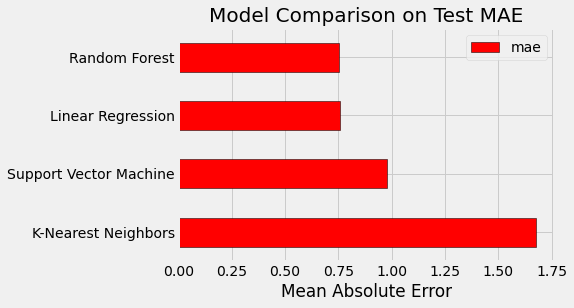

In [93]:
plt.style.use('fivethirtyeight')

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae,
                                         knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

Per mettere in prospettiva queste cifre, la linea di base ingenua calcolata utilizzando il valore mediano del target era 2,4. Chiaramente, l'apprendimento automatico è applicabile al nostro problema a causa del significativo miglioramento rispetto alla linea di base!

Il regressore lineare (MAE = 0.7518) batte leggermente la foresta casuale (MAE=0.7690). Questi risultati non sono del tutto corretti perché utilizziamo principalmente i valori predefiniti per gli iperparametri. Soprattutto in modelli come la macchina vettoriale di supporto , le prestazioni dipendono fortemente da queste impostazioni.

## Ottimizzazione degli iperparametri per l'ottimizzazione del modello
Prima di tutto, cosa sono gli iperparametri e in che cosa differiscono dai parametri ?

* È meglio pensare agli iperparametri del modello come impostazioni per un algoritmo di apprendimento automatico che vengono impostate dal data scientist prima dell'addestramento. Esempi potrebbero essere il numero di alberi in una foresta casuale o il numero di vicini utilizzati nell'algoritmo K-neiest neighbors.
* I parametri del modello sono ciò che il modello apprende durante l'addestramento, come i pesi in una regressione lineare.

Il controllo degli iperparametri influisce sulle prestazioni del modello alterando l'equilibrio tra underfitting e overfitting in un modello. L'underfitting è quando il nostro modello non è abbastanza complesso (non ha abbastanza gradi di libertà) per apprendere la mappatura dalle caratteristiche al target. Un modello underfit ha un'elevata distorsione , che possiamo correggere rendendo il nostro modello più complesso.

L'overfitting è quando il nostro modello memorizza essenzialmente i dati di allenamento. Un modello overfit ha una varianza elevata , che possiamo correggere limitando la complessità del modello attraverso la regolarizzazione. Sia un modello underfit che uno overfit non saranno in grado di generalizzare bene ai dati di test.

Per fare ciò utilizzeremo la ricerca casuale con convalida incrociata

## Ricerca casuale con convalida incrociata
Il particolare metodo di ottimizzazione degli iperparametri che implementeremo è chiamato ricerca casuale con convalida incrociata:

* La ricerca casuale si riferisce alla tecnica che utilizzeremo per selezionare gli iperparametri. Definiamo una griglia e quindi campioniamo casualmente diverse combinazioni, piuttosto che la ricerca della griglia in cui proviamo in modo esauriente ogni singola combinazione. (Sorprendentemente, la ricerca casuale esegue quasi quanto la ricerca sulla griglia con una drastica riduzione del tempo di esecuzione.)
* La convalida incrociata è la tecnica che utilizziamo per valutare una combinazione selezionata di iperparametri. Invece di suddividere l'impostazione di addestramento in set di addestramento e convalida separati, riducendo la quantità di dati di addestramento che possiamo utilizzare, utilizziamo la convalida incrociata K-Fold. Ciò comporta la divisione dei dati di allenamento in K numero di pieghe e quindi il passaggio attraverso un processo iterativo in cui ci alleniamo prima su K-1 delle pieghe e quindi valutiamo le prestazioni sulla K-esima piega. Ripetiamo questo processo K volte e alla fine della convalida incrociata K-fold, prendiamo l'errore medio su ciascuna delle iterazioni di K come misura della performance finale.

L'intero processo di esecuzione della ricerca casuale con convalida incrociata è:

1. Impostare una griglia di iperparametri da valutare
2. Campionare casualmente una combinazione di iperparametri
3. Crea un modello con la combinazione selezionata
4. Valutare il modello utilizzando la convalida incrociata K-fold
5. Decidi quali iperparametri hanno funzionato meglio

Adesso per ogni modello visto sopra faremo questo procedimento per ottimizzare gli iperparametri e li confronteremo nuovamente per vedere qual'è il più performante.

Si possono usare due modelli per ottimizzare gli iperparametri con sklearn, GridSearchCV e RandomizedSearchCV. L'unica differenza tra entrambi gli approcci è che nella ricerca della griglia definiamo le combinazioni ed eseguiamo l'addestramento del modello mentre in RandomizedSearchCV il modello seleziona le combinazioni in modo casuale. Noi useremo RandomizedSearchCV

In [94]:
from sklearn.model_selection import RandomizedSearchCV

def evaluate(model):
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

# Linear regressor

Il modello di regressione lineare non ha alcun iperparametro da ottimizzare.

In [95]:
# svr

param = {
    'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
    'epsilon': [0.001, 0.01, 0.1, 1]
}

svr = RandomizedSearchCV(SVR(), param, cv=5, scoring='neg_mean_absolute_error',
                               n_jobs = -1)

svr.fit(X_train, y_train)
                    
print(svr.best_params_)

{'kernel': 'linear', 'epsilon': 0.1}


Gli iperparametri del codice sopra riguardo al SVR sono:

* Kernel: un insieme di funzioni matematiche che prende i dati come input e li trasforma nella forma richiesta. Questi sono generalmente usati per trovare un iperpiano nello spazio dimensionale superiore. In questo caso si hanno Linear, Non-Linear, Polynomial, Radial Basis Function (RBF) e Sigmoid.

* Linee di confine: Queste sono le due linee che vengono tracciate attorno all'iperpiano a una distanza di ε (epsilon) . Viene utilizzato per creare un margine tra i punti dati.

Ci sarebbero altri iperparametri da inserire ma per non appensantire troppo il programma andiamo ad inserire solamente questi due che reputo i più importanti.

In [104]:
# random forest regressor

param = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth' : [5, 10, 15, 20, 25, 30],
    'max_features': ['sqrt', 'auto'],
    'bootstrap': [True, False],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10, 15, 100],
    'criterion': ["absolute_error"]
}

rfr = RandomizedSearchCV(RandomForestRegressor(random_state=60), param, cv=5, scoring='neg_mean_absolute_error',
                               n_jobs = -1)

rfr.fit(X_train, y_train)
                    
print(rfr.best_params_)

{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'absolute_error', 'bootstrap': True}


* n_estimators — il numero di alberi decisionali che verranno eseguiti nel modello
* max_depth — imposta la profondità massima possibile di ciascun albero
* max_features — il numero massimo di caratteristiche che il modello considererà quando determina una divisione
* bootstrap : il valore predefinito per questo è True, il che significa che il modello segue i principi di bootstrap (definiti in precedenza)
* min_samples_leaf: Il numero minimo di campioni richiesto per essere in un nodo foglia.
* min_samples_split: Il numero minimo di campioni necessari per dividere un nodo interno:

Ci sarebbero molte altri iperparametri ma per importanza e per non appesantire troppo il codice sono stati scelti i seguenti.

In [97]:
# knn

k_range = list(range(1, 30))
param = dict(n_neighbors=k_range)

knr = RandomizedSearchCV(KNeighborsRegressor(), param, cv=5, scoring='neg_mean_absolute_error',
                               n_jobs = -1)

knr.fit(X_train, y_train)
                    
print(knr.best_params_)

{'n_neighbors': 12}


L'iperparametro k è l'unico iperparametro di questo modello. Un valore troppo basso o troppo alto potrebbe portare underfitting od overfitting perciè si è scelto di tenere un range di valori da 1 a 30 e vedere il modello con quale numero di k performa meglio.

Adesso vediamo dopo l'ottimizzazione degli iperparametri quale modello è più performante

In [98]:
new_svm_mae = evaluate(svr)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % new_svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 0.7263


In [105]:
new_random_forest_mae = evaluate(rfr)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % new_random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 0.7310


In [100]:
new_knn_mae = evaluate(knr)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f'% new_knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 1.7081


Text(0.5, 1.0, 'Model Comparison on Test MAE')

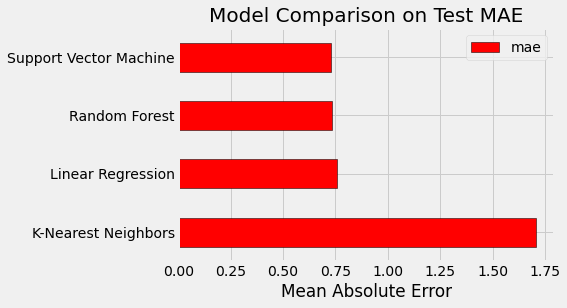

In [106]:

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, new_svm_mae, new_random_forest_mae, 
                                         new_knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20)

Nonostante con l'ottimizzazione dei parametri il modello Random forest e Svm sia leggermente migliore del Linear Regression essendo un modello più semplice ed interpretabile scelgo di tenere quest'ultimo per questo set di dati. 

## 6. Importanza delle features
L'importanza delle funzionalità si riferisce a una classe di tecniche per assegnare punteggi alle funzionalità di input a un modello predittivo che indica l'importanza relativa di ciascuna funzionalità quando si effettua una previsione. Tutti gli algoritmi sopra trovano un insieme di coefficienti da utilizzare nella somma ponderata per fare una previsione. Questi coefficienti possono essere utilizzati direttamente come un tipo grezzo di punteggio di importanza della caratteristica.

In [107]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

final_model = LinearRegression()
final_model.fit(X_train, y_train)

intercept = final_model.intercept_
features = pd.DataFrame(final_model.coef_, X.columns, columns=['coefficient'])

features.coefficient.round(3)
features.coefficient = features.coefficient.abs()

stdevs = []

for i in X.columns:
    stdev = X[i].std()
    stdevs.append(stdev)
 

features["stdev"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["coefficient"] * features["stdev"]

features['importance_normalized'] = 100 * features['importance'] / features['importance'].max()

features

coefficient  stdev  importance  \
age                                         0.371  1.218       0.452   
absences                                    0.872  4.641       4.049   
G1                                          3.879  2.745      10.649   
G2                                         15.585  2.914      45.409   
school_GP                                   0.185  0.477       0.088   
address_R                                   0.148  0.460       0.068   
Medu_istruzione primaria (4th grado)        0.211  0.415       0.088   
Medu_istruzione superiore                   0.126  0.444       0.056   
Fedu_istruzione primaria (4th grado)        0.138  0.443       0.061   
Fedu_istruzione superiore                   0.015  0.398       0.006   
Mjob_at_home                                0.106  0.406       0.043   
studytime_<2 hours                          0.141  0.469       0.066   
failures_0                                  0.515  0.361       0.186   
failures_2                                  0.584  0.155       0.091   
failures_3                                  0.193  0.145       0.028   
higher_no                                   0.013  0.308       0.004   
goout_very high                             0.112  0.375       0.042   
Dalc_high                                   1.215  0.160       0.194   
Dalc_very high                              0.364  0.160       0.058   
Walc_very high                              0.309  0.254       0.078   

                                      importance_normalized  
age                                                   0.995  
absences                                              8.917  
G1                                                   23.450  
G2                                                  100.000  
school_GP                                             0.194  
address_R                                             0.150  
Medu_istruzione primaria (4th grado)                  0.193  
Medu_istruzione superiore                             0.123  
Fedu_istruzione primaria (4th grado)                  0.134  
Fedu_istruzione superiore                             0.014  
Mjob_at_home                                          0.095  
studytime_<2 hours                                    0.145  
failures_0                                            0.409  
failures_2                                            0.199  
failures_3                                            0.062  
higher_no                                             0.009  
goout_very high                                       0.092  
Dalc_high                                             0.428  
Dalc_very high                                        0.128  
Walc_very high                                        0.173

## Conclusione

Come prevedibile le features più importanti sono le votazioni relative a G2 seguite da G1 e dal numero di assenze. Tuttavia delle features categoriche da segnalare come chi beve settimanalmente spesso abbia una piccola influenza sulla votazione finale.